# Linear Regression Assignment

# Imporing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



**supress warning**

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [3]:
bike_df=pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**checking for rows and colums**

In [4]:
bike_df.shape

(730, 16)

* there are 730 rows and 16 columns

**Information about datas**

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Describing the columns**

In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**checking for null_values**

In [7]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* there are no  values in the data set

**Data cleaning**

* dropping 'instant' as it is just index column
* dropping 'dteday' as 'year' and 'month' columns are already in the data
* dropping 'casual' and 'registered' as 'cnt' is our target variable and also it is addition of both 'casual' and 'registered' 

In [8]:
var=['instant','dteday','casual','registered']
bike_df.drop(var,axis=1,inplace=True)

In [9]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
#checking for how many columns left after dropping 
bike_df.shape[1]

12

**Data Preparation**

In [11]:
#encoding season column
bike_df.season=bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
#changing 'mnth' to 'month' 
bike_df.rename(columns={'mnth':'month'},inplace=True)

In [13]:
#encoding the month column
bike_df.month=bike_df.month.map({1:'january', 2:'February', 3:'march', 4:'april',5:'may', 6:'june', 7:'july', 8:'august',9:'september', 10:'october', 11:'november', 12:'december'})

In [14]:
#encoding for weekday
bike_df.weekday=bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [15]:
#encoding for weathersit
bike_df.weathersit=bike_df.weathersit.map({1:'good',2:'moderate',3:'bad',4:'severe'})

In [16]:
bike_df.head()

,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualisation

In [17]:
cont_cols=['temp','atemp','hum','windspeed','cnt']
cat_cols=['season','yr','month','holiday','weekday','workingday','weathersit']
target=['cnt']

**for numerical columns**

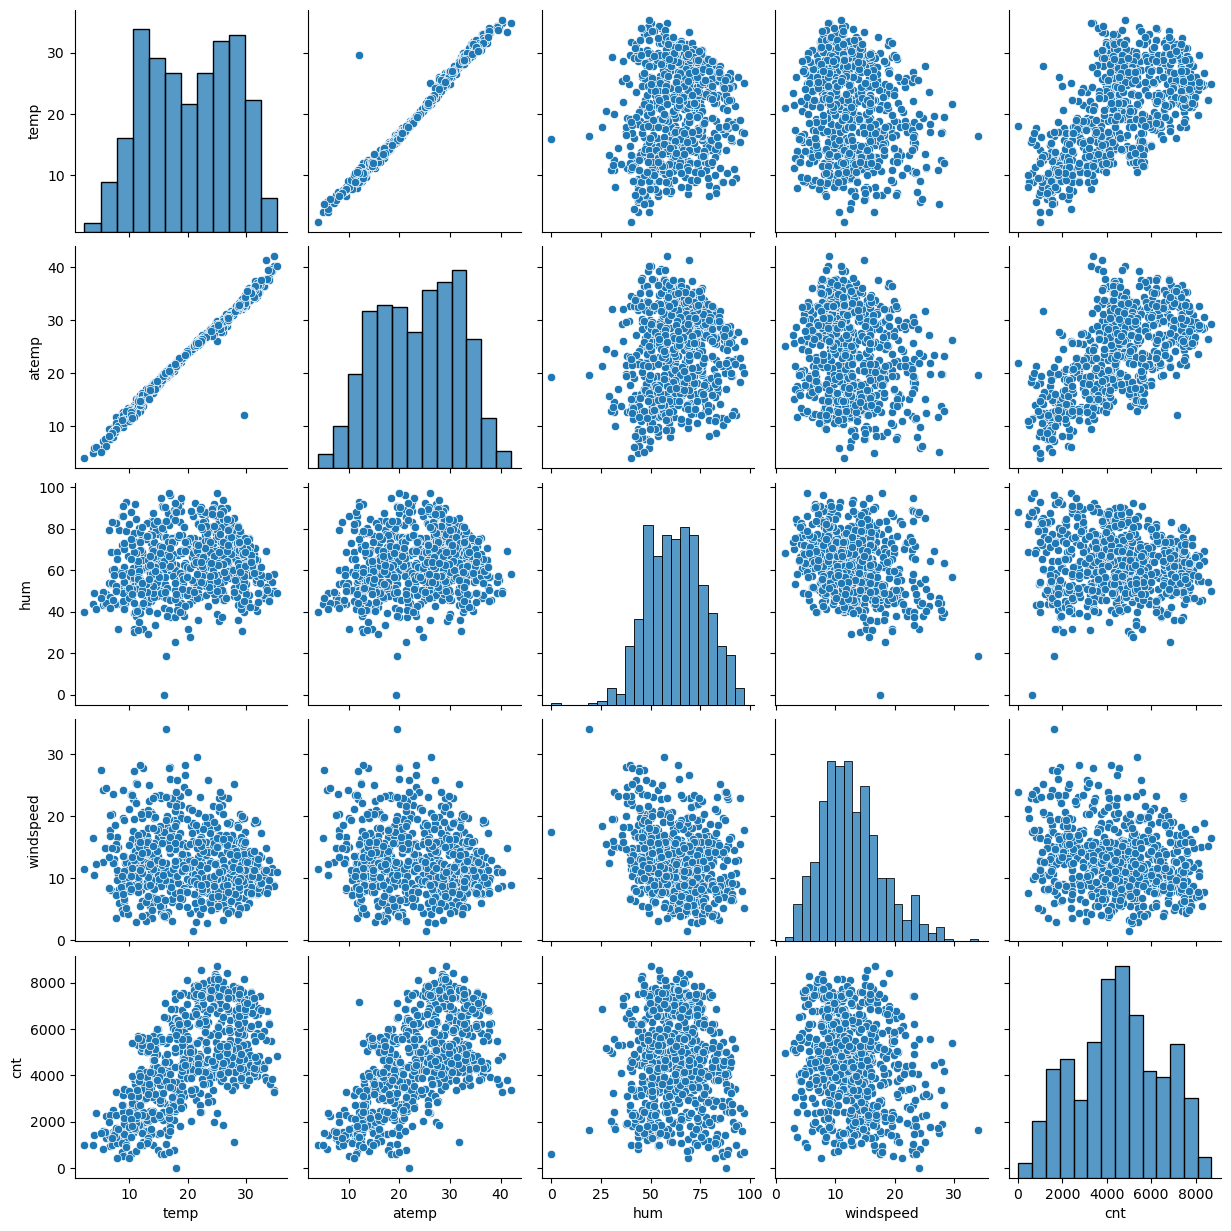

In [18]:
sns.pairplot(data=bike_df,vars=cont_cols)
plt.show()

* cnt and temp shows a linear relationship

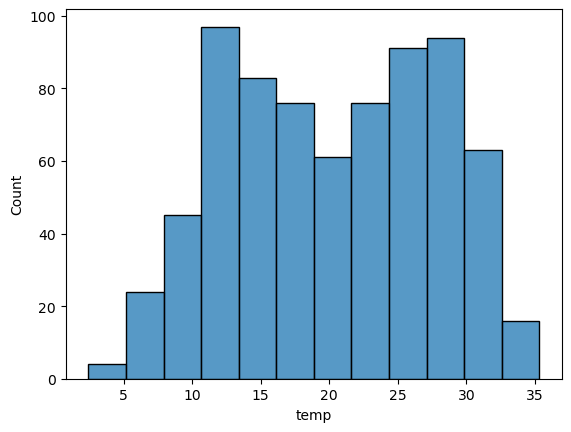

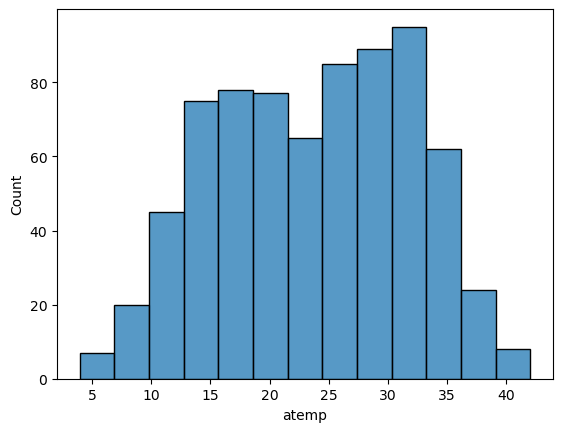

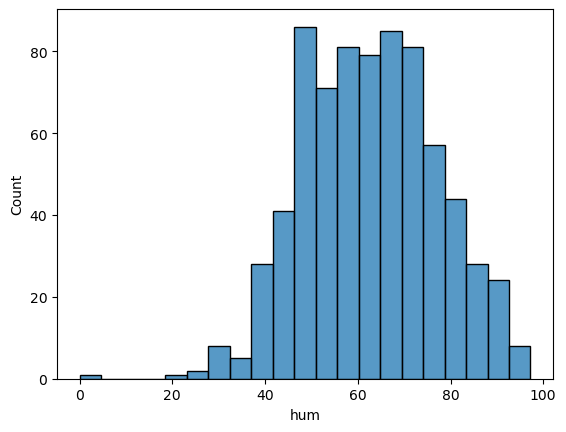

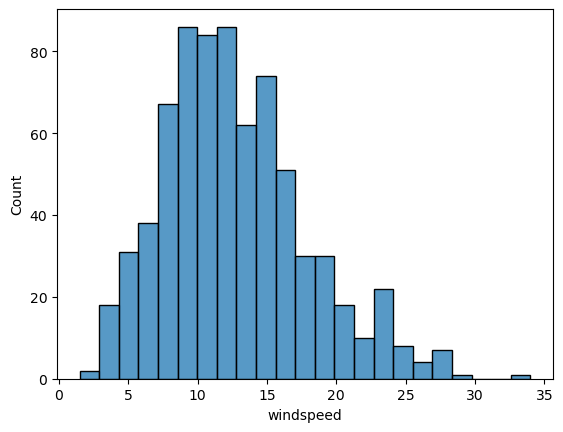

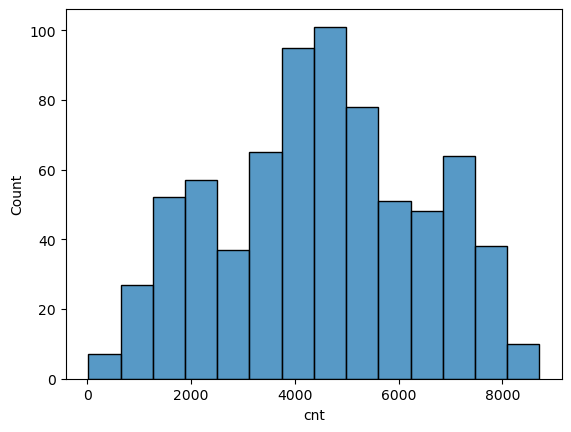

In [19]:

for i in cont_cols:
    sns.histplot(bike_df[i])
    plt.show()

**for categorical columns**

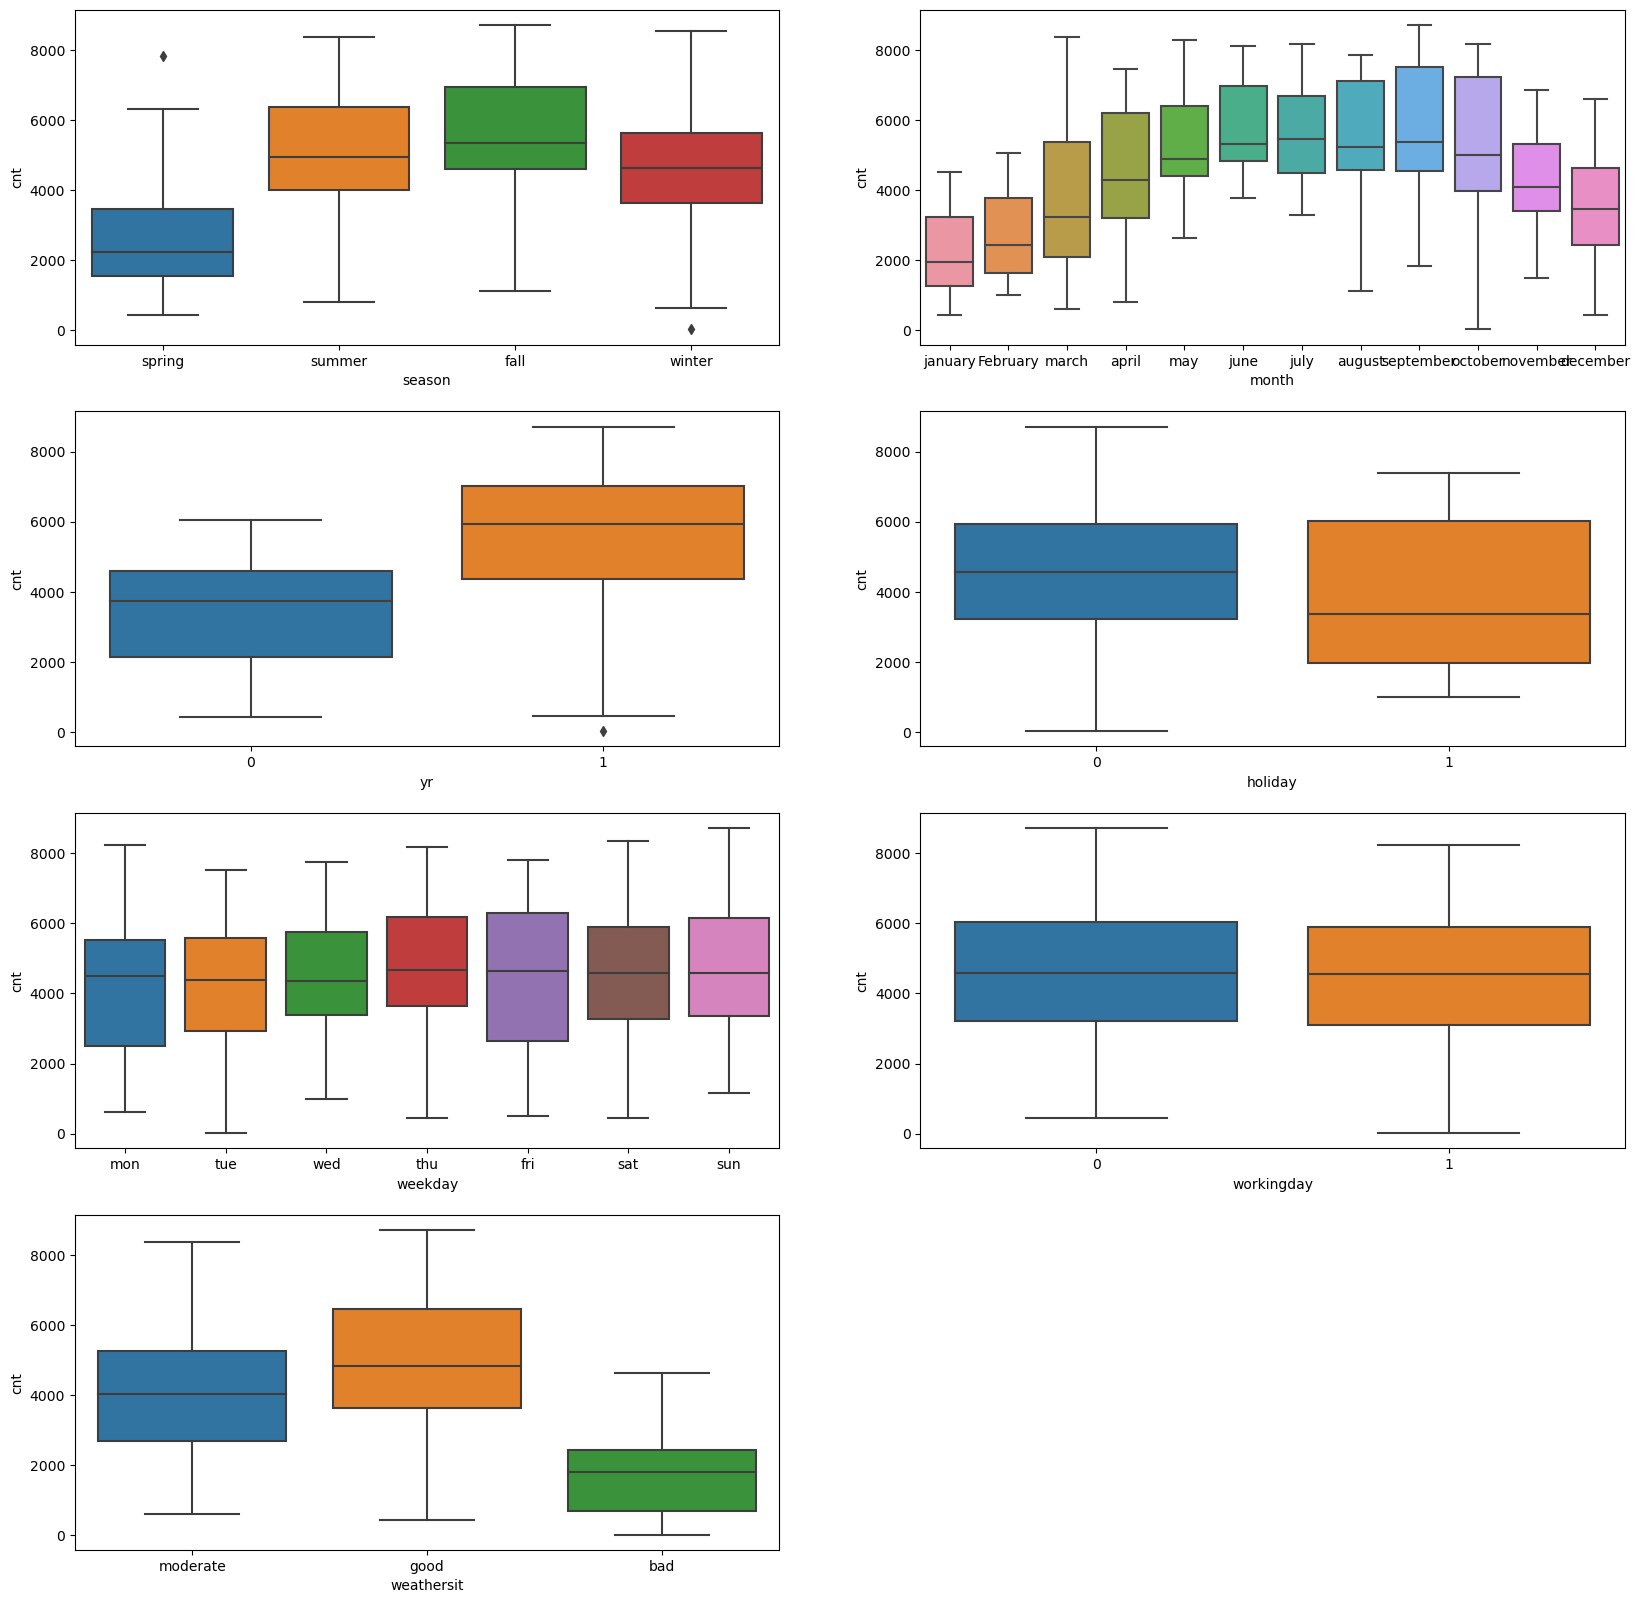

In [20]:
plt.figure(figsize=(20, 20))

plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=bike_df)

plt.subplot(4,2,2)
sns.boxplot(x='month',y='cnt',data=bike_df)

plt.subplot(4,2,3)
sns.boxplot(x='yr',y='cnt',data=bike_df)

plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt',data=bike_df)


plt.subplot(4,2,5)
sns.boxplot(x='weekday',y='cnt',data=bike_df)


plt.subplot(4,2,6)
sns.boxplot(x='workingday',y='cnt',data=bike_df)


plt.subplot(4,2,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)



plt.show()

# Preparation of Data

**creating dummy variables**

In [21]:
bike_df.columns

Index(['season', 'yr', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [22]:
bike_df[cat_cols].nunique()

season         4
yr             2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

* Dummy variables are created in case of categorical variables if number of unique categories are more than 2

In [23]:
#creating dummies 
season_dum=pd.get_dummies(bike_df['season'],drop_first=True)
month_dum=pd.get_dummies(bike_df['month'],drop_first=True)
weekday_dum=pd.get_dummies(bike_df['weekday'],drop_first=True)
weathersit_dum=pd.get_dummies(bike_df['weathersit'],drop_first=True)

In [24]:
#concating the dummies wih main data set
bike_df=pd.concat([bike_df,season_dum,month_dum,weekday_dum,weathersit_dum],axis=1)

In [25]:
#checking after concating dummies with main data
bike_df.head()

,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,october,september,mon,sat,sun,thu,tue,wed,good,moderate
0,spring,0,january,0,mon,1,moderate,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,january,0,tue,1,moderate,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,january,0,wed,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,1,0
3,spring,0,january,0,thu,1,good,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,1,0
4,spring,0,january,0,fri,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0


In [26]:
bike_df.columns

Index(['season', 'yr', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'april', 'august', 'december', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed', 'good', 'moderate'],
      dtype='object')

In [27]:
#checking shape after concating
bike_df.shape

(730, 34)

In [28]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  april       730 non-null    uint8  
 16  august      730 non-null    uint8  
 17  december    730 non-null    uint8  
 18  january     730 non-null    uint8  
 19  july        730 non-null    u

In [29]:
#dropping the columns as we created dummies from them
bike_df.drop(['season','month','weekday','weathersit'],axis=1,inplace=True)

In [30]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,mon,sat,sun,thu,tue,wed,good,moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
#checking shape after droping columns
bike_df.shape

(730, 30)

# Splitting the Data into Training and Testing Sets

In [32]:
df_train,df_test=train_test_split(bike_df,train_size=.7,random_state=100)

In [33]:
#checking after splitting data set
print(df_train.shape)
print(df_test.shape)


(510, 30)
(220, 30)


**Rescaling The Features**

In [34]:
scaler=MinMaxScaler()

In [35]:
num_vars=['temp','atemp','hum','windspeed','cnt']

In [36]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [37]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,mon,sat,sun,thu,tue,wed,good,moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,mon,sat,sun,thu,tue,wed,good,moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* all variables lies between 0 to and 1 after scaling

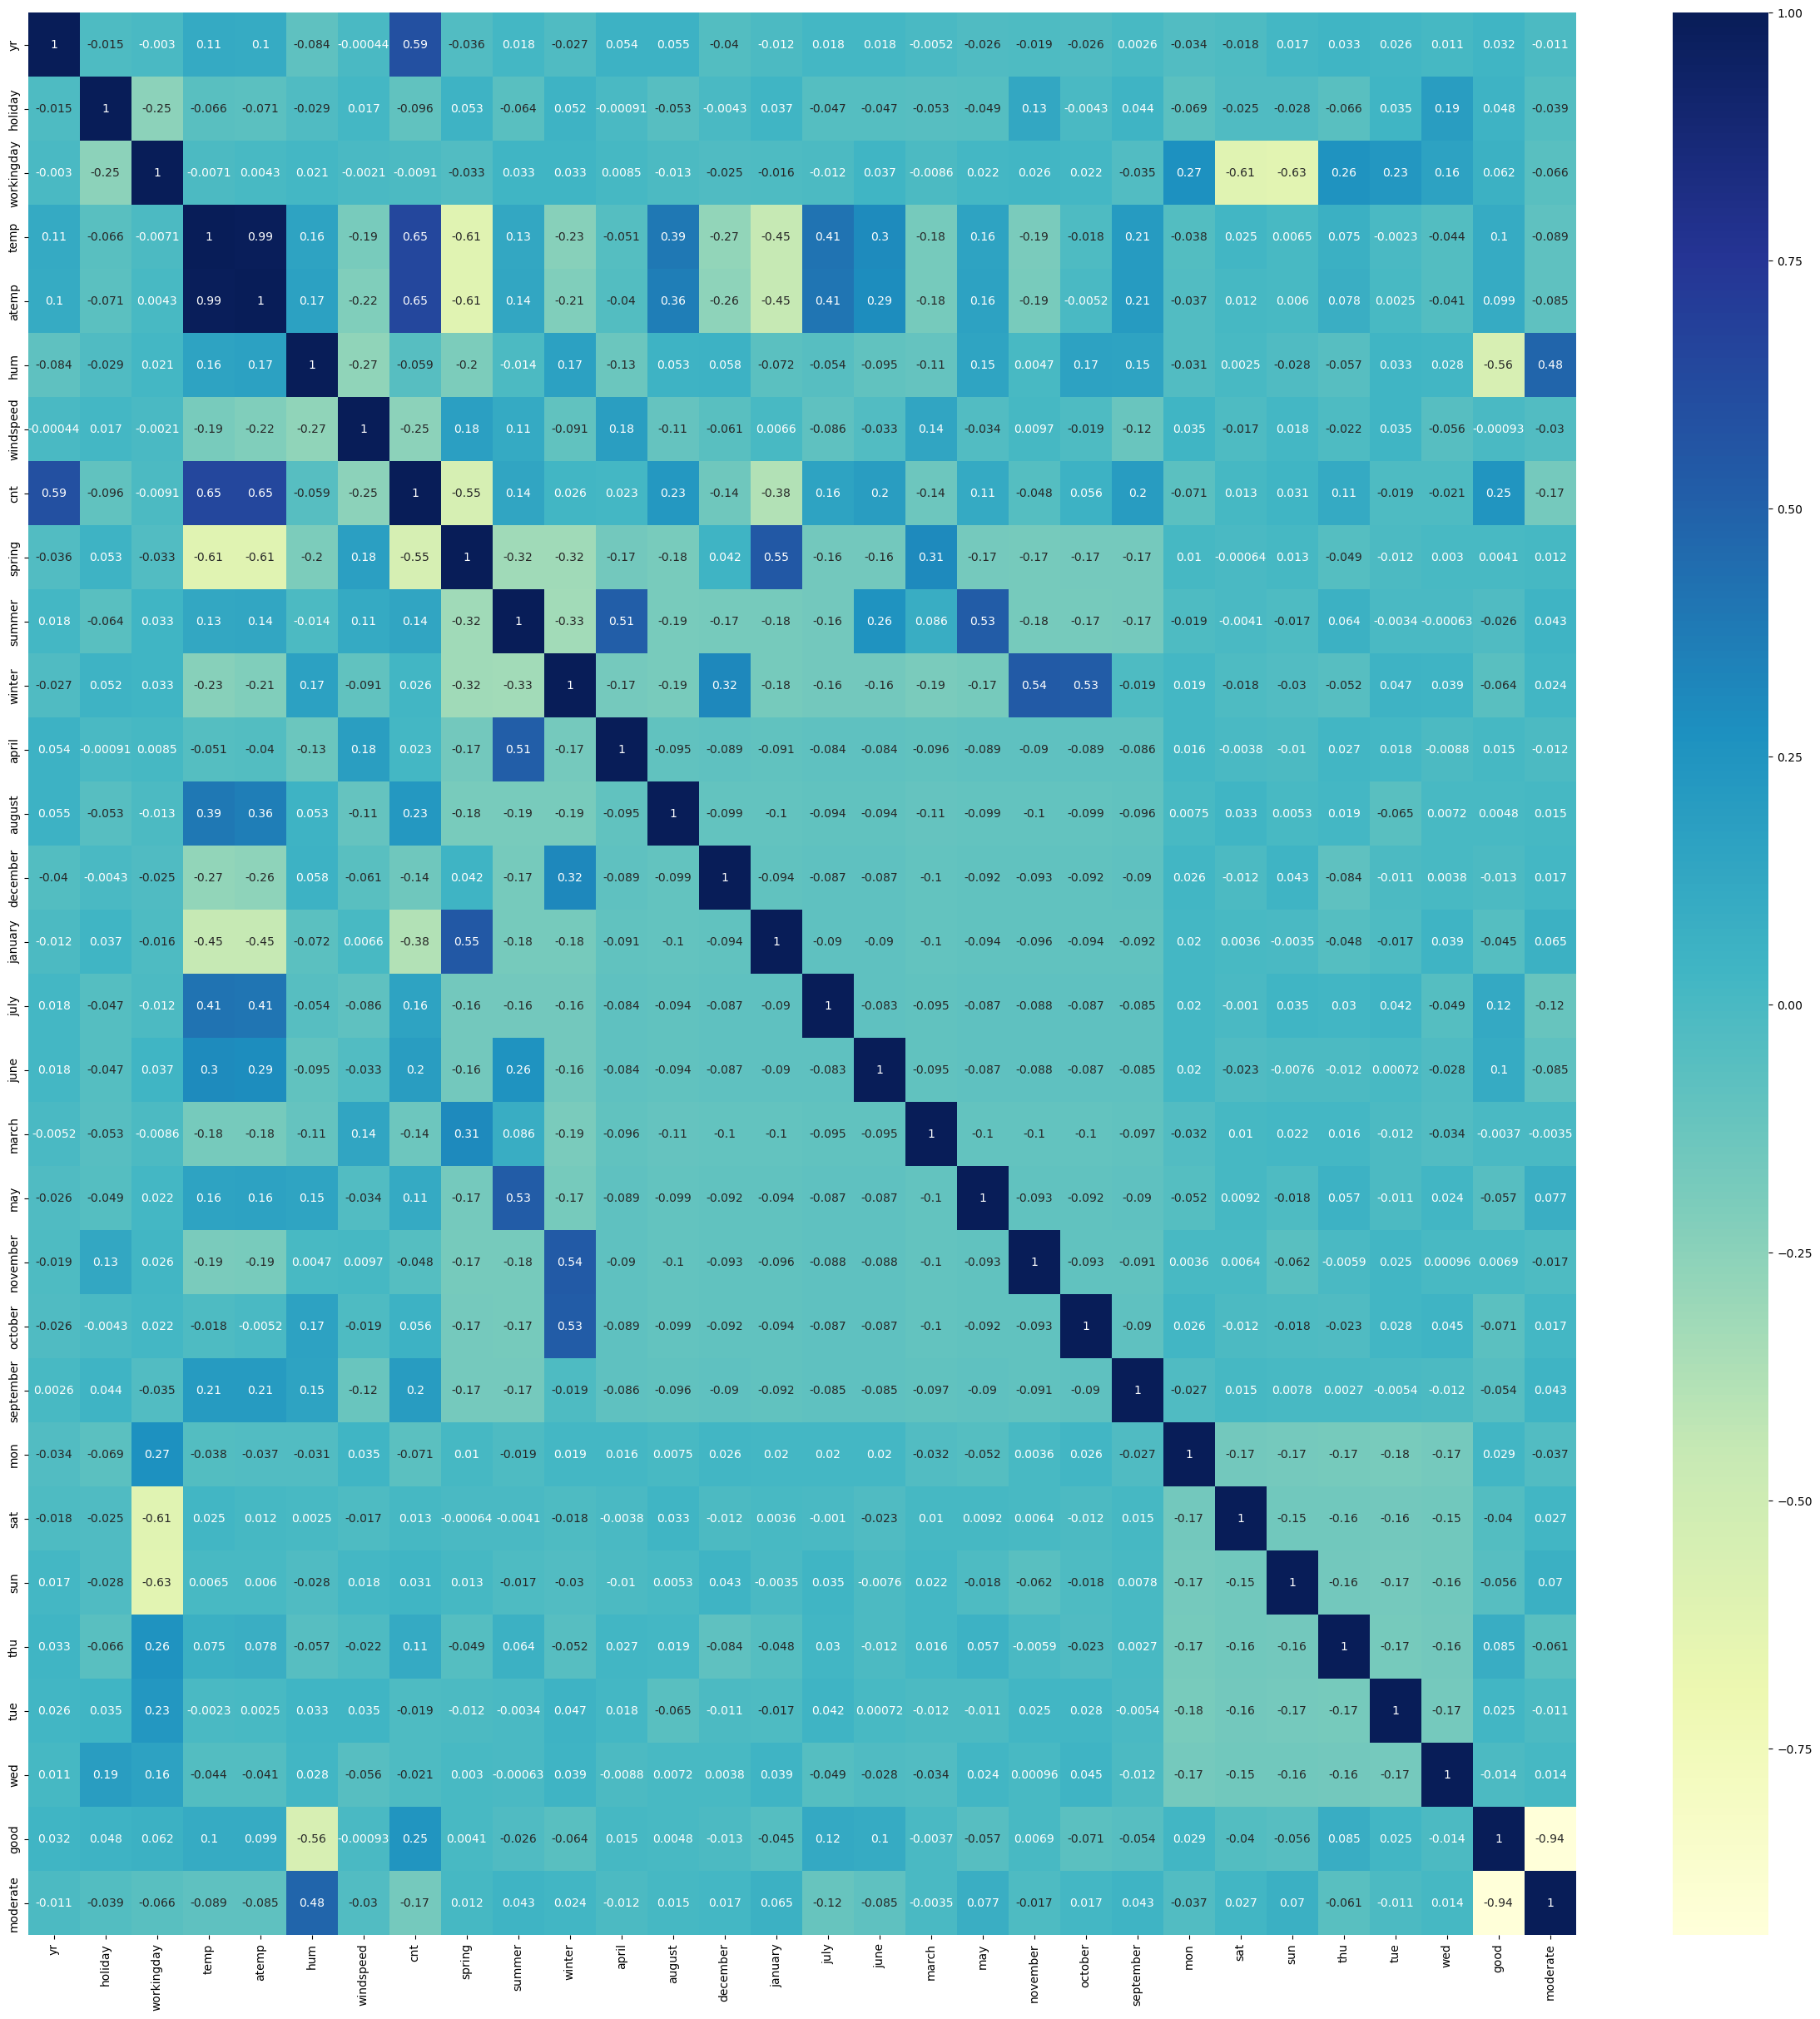

In [39]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [40]:
# extracting dependent and independent variable to y_train and X_train
y_train=df_train.pop('cnt')
X_train=df_train

In [41]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [42]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,october,september,mon,sat,sun,thu,tue,wed,good,moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# RFE for variable seletion

In [43]:
# selecting 15 independent variable by using RFE
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('april', False, 3),
 ('august', True, 1),
 ('december', False, 13),
 ('january', False, 8),
 ('july', False, 11),
 ('june', False, 2),
 ('march', True, 1),
 ('may', True, 1),
 ('november', False, 15),
 ('october', True, 1),
 ('september', True, 1),
 ('mon', False, 10),
 ('sat', False, 6),
 ('sun', False, 7),
 ('thu', False, 14),
 ('tue', False, 9),
 ('wed', False, 12),
 ('good', True, 1),
 ('moderate', True, 1)]

In [45]:
#list of selected variables
selected_cols=X_train.columns[rfe.support_]
selected_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'august', 'march', 'may', 'october', 'september', 'good',
       'moderate'],
      dtype='object')

In [46]:
X_train=X_train[selected_cols]

In [47]:
X_train.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,august,march,may,october,september,good,moderate
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [48]:
# adding constant before doing model
X_train=sm.add_constant(X_train)

In [49]:
X_train.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,august,march,may,october,september,good,moderate
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      510 non-null    float64
 1   yr         510 non-null    int64  
 2   holiday    510 non-null    int64  
 3   temp       510 non-null    float64
 4   hum        510 non-null    float64
 5   windspeed  510 non-null    float64
 6   spring     510 non-null    uint8  
 7   summer     510 non-null    uint8  
 8   winter     510 non-null    uint8  
 9   august     510 non-null    uint8  
 10  march      510 non-null    uint8  
 11  may        510 non-null    uint8  
 12  october    510 non-null    uint8  
 13  september  510 non-null    uint8  
 14  good       510 non-null    uint8  
 15  moderate   510 non-null    uint8  
dtypes: float64(4), int64(2), uint8(10)
memory usage: 32.9 KB


#  Model Building

In [51]:
ml1=sm.OLS(y_train,X_train)
result1=ml1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.00e-188
Time:                        18:35:23   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0370      0.048      0.774      0.4

In [52]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,const,144.608604
1,yr,1.038122
2,holiday,1.022335
3,temp,3.834200
4,hum,1.934945
5,windspeed,1.200829
6,spring,6.162605
7,summer,3.852673
8,winter,4.785820
9,august,1.679897


* drop good as high VIF >5

In [53]:
# dropping 'good' variable
X_train=X_train.drop('good',axis=1)

In [54]:
#building model on new dataset
ml2=sm.OLS(y_train,X_train)
result2=ml2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     159.2
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          5.20e-173
Time:                        18:35:23   Log-Likelihood:                 473.77
No. Observations:                 510   AIC:                            -917.5
Df Residuals:                     495   BIC:                            -854.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3300      0.038      8.581      0.0

In [55]:
# checking for VIF
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,const,80.154910
1,yr,1.038083
2,holiday,1.020775
3,temp,3.764712
4,hum,1.638098
5,windspeed,1.156784
6,spring,6.095544
7,summer,3.834922
8,winter,4.745784
9,august,1.676035


In [56]:
# dropping 'spring' as VIF>5 and p-value>.05
X_train=X_train.drop('spring',axis=1)

In [57]:
#fitting model
ml3=sm.OLS(y_train,X_train)
result3=ml3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     171.5
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          5.46e-174
Time:                        18:35:23   Log-Likelihood:                 473.41
No. Observations:                 510   AIC:                            -918.8
Df Residuals:                     496   BIC:                            -859.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3085      0.028     10.891      0.0

In [58]:
# checking for VIF
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,const,43.518238
1,yr,1.029107
2,holiday,1.018253
3,temp,1.620135
4,hum,1.626385
5,windspeed,1.150277
6,summer,1.739638
7,winter,1.780834
8,august,1.472191
9,march,1.146717


In [59]:
# dropping october as p-value>0.05
X_train=X_train.drop('october',axis=1)

In [60]:
# fitting model after droping 
ml4=sm.OLS(y_train,X_train)
result4=ml4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          8.15e-175
Time:                        18:35:23   Log-Likelihood:                 472.66
No. Observations:                 510   AIC:                            -919.3
Df Residuals:                     497   BIC:                            -864.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3031      0.028     10.831      0.0

In [61]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,const,42.421755
1,yr,1.028679
2,holiday,1.017555
3,temp,1.572543
4,hum,1.610229
5,windspeed,1.143981
6,summer,1.734562
7,winter,1.388681
8,august,1.458041
9,march,1.146631


In [62]:
# dropping march as p value shows it inignificant
X_train=X_train.drop('march',axis=1)

In [63]:
#building model afetr dropping data
ml5=sm.OLS(y_train,X_train)
result5=ml5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     201.7
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.66e-175
Time:                        18:35:23   Log-Likelihood:                 471.54
No. Observations:                 510   AIC:                            -919.1
Df Residuals:                     498   BIC:                            -868.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3081      0.028     11.077      0.0

In [64]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,const,41.804215
1,yr,1.028639
2,holiday,1.013727
3,temp,1.541675
4,hum,1.609829
5,windspeed,1.139861
6,summer,1.727044
7,winter,1.319376
8,august,1.447242
9,may,1.462875


In [65]:
# dropping may for p-value>.05
X_train=X_train.drop('may',axis=1)

In [66]:
# new model after dropping variable
ml6=sm.OLS(y_train,X_train)
result6=ml6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          3.35e-176
Time:                        18:35:23   Log-Likelihood:                 470.38
No. Observations:                 510   AIC:                            -918.8
Df Residuals:                     499   BIC:                            -872.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.028     10.962      0.0

In [67]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,const,41.198850
1,yr,1.027266
2,holiday,1.013673
3,temp,1.528256
4,hum,1.581063
5,windspeed,1.136025
6,summer,1.373633
7,winter,1.317733
8,august,1.440459
9,september,1.210595


* we can see there is no variable left that has high VIF as >5 and high p-value as >.05 , so we can say we get our model for prediction

* R-squared value is 0.816 which is good as it shows 81% data is being explained by this model

In [68]:
# coefficient for model variables
result6.params

const        0.303037
yr           0.229612
holiday     -0.084555
temp         0.556023
hum         -0.305790
windspeed   -0.228229
summer       0.106638
winter       0.144687
august       0.057894
september    0.120108
moderate    -0.023132
dtype: float64

# Residual Analysis

In [69]:
X_train

,const,yr,holiday,temp,hum,windspeed,summer,winter,august,september,moderate
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,1,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0,1
79,1.0,0,0,0.462664,0.759870,0.529881,1,0,0,0,1


In [70]:
# predicting dependent variable to check for error distribution
y_train_pred=result6.predict(X_train)

In [71]:
res=y_train-y_train_pred

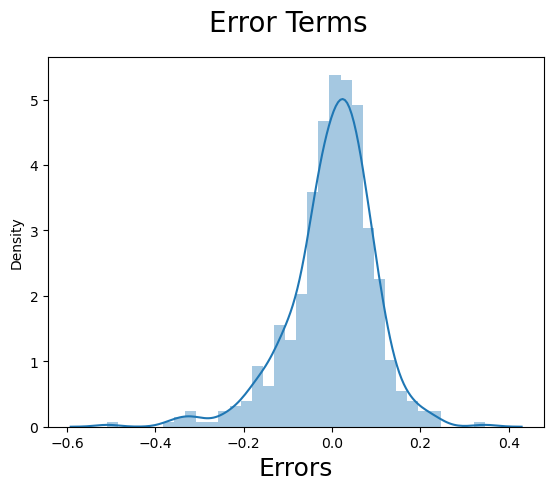

In [72]:
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)   
plt.xlabel('Errors', fontsize = 18)     
plt.show()

* the error are normallly distribued and scatter around 0 which is good

# Making prediction

In [73]:
#scaling test datas
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [74]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,mon,sat,sun,thu,tue,wed,good,moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,1,0


In [75]:
# deviding target variable and independent variables
y_test=df_test.pop('cnt')
X_test=df_test

In [76]:
# adding constant
X_test=sm.add_constant(X_test)

In [77]:
test_col=X_train.columns
X_test=X_test[test_col]

In [78]:
X_test

,const,yr,holiday,temp,hum,windspeed,summer,winter,august,september,moderate
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,0,0,1
535,1.0,1,0,0.901354,0.610133,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,1,0,0,1
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,1,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.756118,0.283397,0,1,0,0,0
127,1.0,0,0,0.584649,0.650923,0.069510,1,0,0,0,0
640,1.0,1,0,0.745598,0.817947,0.052115,0,1,0,0,1
72,1.0,0,0,0.331557,0.512107,0.203418,0,0,0,0,0


In [79]:
#making prediction
y_pred=result6.predict(X_test)

In [80]:
#checking for r2 value of y_test and y_pred 
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8034

# Model evaluation

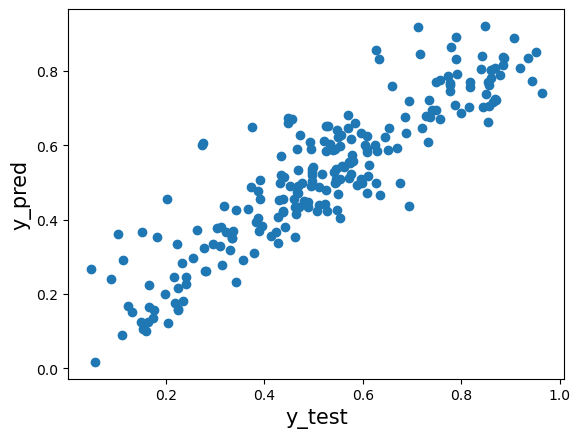

In [81]:
#building scatter plot
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 15) 
plt.show()

In [82]:
result6.params

const        0.303037
yr           0.229612
holiday     -0.084555
temp         0.556023
hum         -0.305790
windspeed   -0.228229
summer       0.106638
winter       0.144687
august       0.057894
september    0.120108
moderate    -0.023132
dtype: float64

*  equatiomn for best fit line

$ cnt=0.303037+ yr * 0.229612 + holiday* (-0.084555)+temp*0.556023+hum*(-0.305790)+windspeed*(-0.228229)+summer*0.106638+summer*0.106638+winter*0.144687+august*0.057894+september*0.120108+moderate*(-0.023132) $

**Demand   of bikes depends on yr,holiday,temp,hum,windspeed,summer,winter,august,september, moderate weather**